In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

2024-01-26 14:54:06.261508: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 14:54:08.160119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 14:54:08.160215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 14:54:08.468865: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 14:54:09.071914: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 14:54:09.074030: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = pd.read_csv("/workspaces/AITemplate/Kaggle/WineQuality/Datasets/winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data["fixed acidity"] = data["fixed acidity"]/data["fixed acidity"].max()
data["volatile acidity"] = data["volatile acidity"]/data["volatile acidity"].max()
data["residual sugar"] = data["residual sugar"]/data["residual sugar"].max()
data["chlorides"] = data["chlorides"]/data["chlorides"].max()
data["free sulfur dioxide"] = data["free sulfur dioxide"]/data["free sulfur dioxide"].max()
data["total sulfur dioxide"] = data["total sulfur dioxide"]/data["total sulfur dioxide"].max()
data["density"] = data["density"]/data["density"].max()
data["pH"] = data["pH"]/data["pH"].max()
data["sulphates"] = data["sulphates"]/data["sulphates"].max()
data["alcohol"] = data["alcohol"]/data["alcohol"].max()

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.523248,0.334064,0.270976,0.163794,0.143153,0.220485,0.160788,0.993082,0.825714,0.329074,0.699529,5.636023
std,0.109503,0.113329,0.194801,0.090963,0.077030,0.145280,0.113825,0.001880,0.038500,0.084753,0.071521,0.807569
min,0.289308,0.075949,0.000000,0.058065,0.019640,0.013889,0.020761,0.986430,0.683292,0.165000,0.563758,3.000000
25%,0.446541,0.246835,0.090000,0.122581,0.114566,0.097222,0.076125,0.991940,0.800499,0.275000,0.637584,5.000000
50%,0.496855,0.329114,0.260000,0.141935,0.129296,0.194444,0.131488,0.993086,0.825436,0.310000,0.684564,6.000000
75%,0.578616,0.405063,0.420000,0.167742,0.147300,0.291667,0.214533,0.994167,0.847880,0.365000,0.744966,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.523248,0.334064,0.270976,0.163794,0.143153,0.220485,0.160788,0.993082,0.825714,0.329074,0.699529,5.636023
std,0.109503,0.113329,0.194801,0.090963,0.077030,0.145280,0.113825,0.001880,0.038500,0.084753,0.071521,0.807569
min,0.289308,0.075949,0.000000,0.058065,0.019640,0.013889,0.020761,0.986430,0.683292,0.165000,0.563758,3.000000
25%,0.446541,0.246835,0.090000,0.122581,0.114566,0.097222,0.076125,0.991940,0.800499,0.275000,0.637584,5.000000
50%,0.496855,0.329114,0.260000,0.141935,0.129296,0.194444,0.131488,0.993086,0.825436,0.310000,0.684564,6.000000
75%,0.578616,0.405063,0.420000,0.167742,0.147300,0.291667,0.214533,0.994167,0.847880,0.365000,0.744966,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [9]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

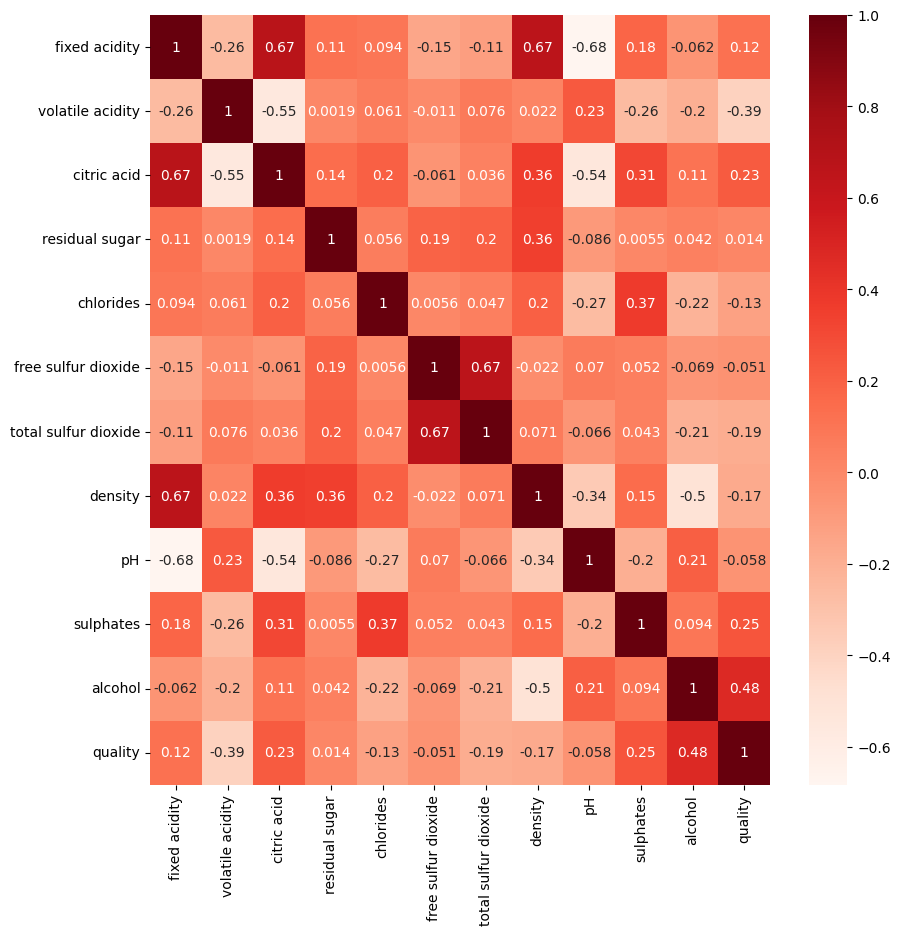

In [10]:
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
X = data.drop(["quality"], axis=1)
y = data["quality"]

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872


In [13]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

Epoch 1/100


160/160 [==============================] - 1s 1ms/step - loss: 3.2276 - mse: 3.2276
Epoch 2/100
160/160 [==============================] - 0s 1ms/step - loss: 0.5049 - mse: 0.5049
Epoch 3/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833
Epoch 4/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4869 - mse: 0.4869
Epoch 5/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4625 - mse: 0.4625
Epoch 6/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4541 - mse: 0.4541
Epoch 7/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4443 - mse: 0.4443
Epoch 8/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4612 - mse: 0.4612
Epoch 9/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4682 - mse: 0.4682
Epoch 10/100
160/160 [==============================] - 0s 1ms/step - loss: 0.4360 - mse: 0.4360
Epoch 11/100
160/160 [=============================

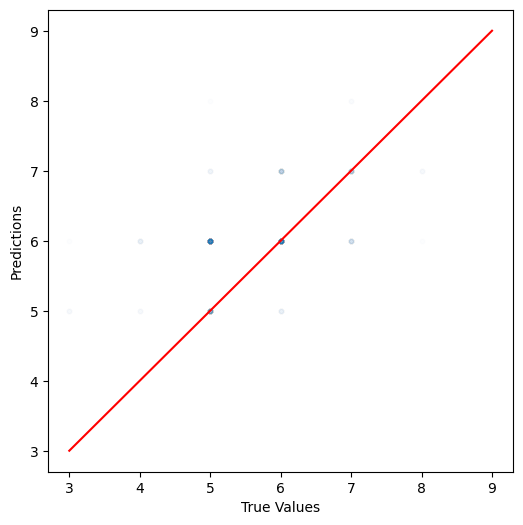

10/10 [==============================] - 0s 850us/step


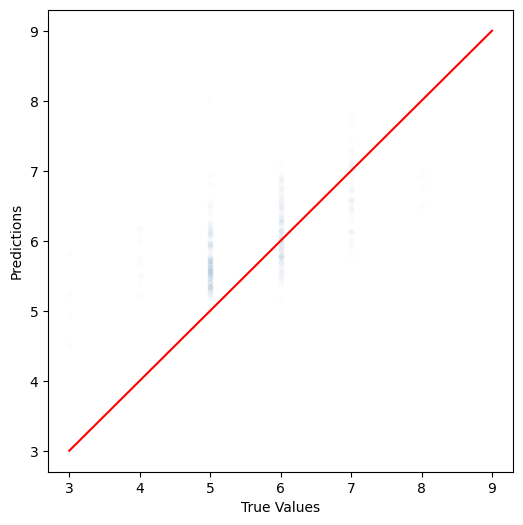

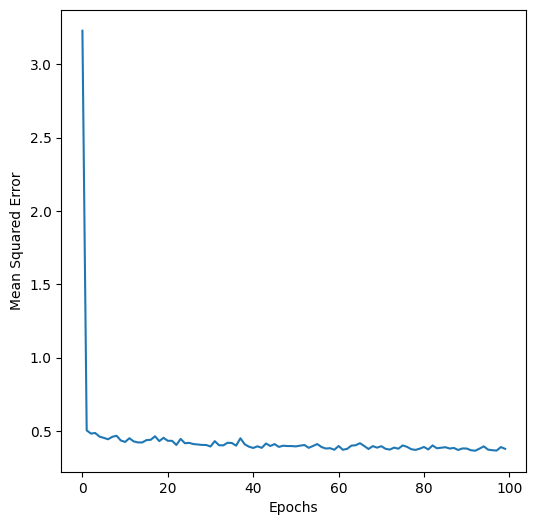

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               3072      
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
0.76726297802834

In [19]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=(X_train.shape[1]), use_bias=True))
model.add(Dense(128, activation="relu", use_bias=True))
model.add(Dense(64, activation="relu", use_bias=True))
model.add(Dense(32, activation="relu", use_bias=True))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
number_of_epochs = 100
history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=8, verbose=1)

model.evaluate(X_test, y_test)
prediction = np.round(model.predict(X_test), 0)
plt.figure(figsize=(6,6))
plt.scatter(y_test, prediction, s=10, alpha=0.01)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([3,9],[3,9], "r")
plt.show() 

model.evaluate(X_test, y_test)
prediction = model.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, prediction, s=10, alpha=0.01)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([3,9],[3,9], "r")
plt.show() 


#plot the mean squared error for each epoch
plt.figure(figsize=(6,6))
plt.plot(range(number_of_epochs), history.history["mse"])
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

model.summary()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction) 
rmse = np.sqrt(mse)
print(rmse)

Epoch 1/30


1023/1023 [==============================] - 2s 1ms/step - loss: 1.5382 - accuracy: 0.3763 - val_loss: 1.2167 - val_accuracy: 0.5000
Epoch 2/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.1682 - accuracy: 0.4457 - val_loss: 1.2114 - val_accuracy: 0.4648
Epoch 3/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.1553 - accuracy: 0.4614 - val_loss: 1.2393 - val_accuracy: 0.3984
Epoch 4/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.1531 - accuracy: 0.4809 - val_loss: 1.1938 - val_accuracy: 0.4688
Epoch 5/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.1410 - accuracy: 0.4721 - val_loss: 1.1924 - val_accuracy: 0.4648
Epoch 6/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.1180 - accuracy: 0.5064 - val_loss: 1.1629 - val_accuracy: 0.5312
Epoch 7/30
1023/1023 [==============================] - 1s 1ms/step - loss: 1.0990 - accuracy: 0.5171 - val_loss: 1.1409 - val_accuracy: 0.5547
Epo

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


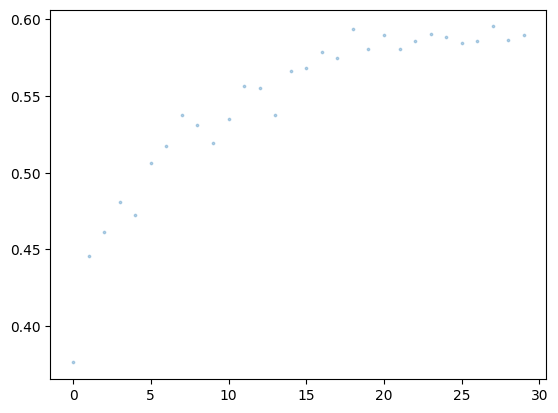

In [18]:
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(11, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(11, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

number_of_epochs = 30
history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=1, verbose=1, validation_split=0.2)

model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (model.evaluate(X_test, y_test)[1]*100))
print(np.argmax(model.predict(X_test), axis=-1)[:10])
print(y_test[:10].values)

plt.scatter(range(number_of_epochs), history.history['accuracy'], s=3, alpha=0.3)
model.save("model2.h5")
